In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement-dataset/placement.csv


In [3]:
import pandas as pd
df=pd.read_csv("/kaggle/input/placement-dataset/placement.csv")

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


Text(0, 0.5, 'package')

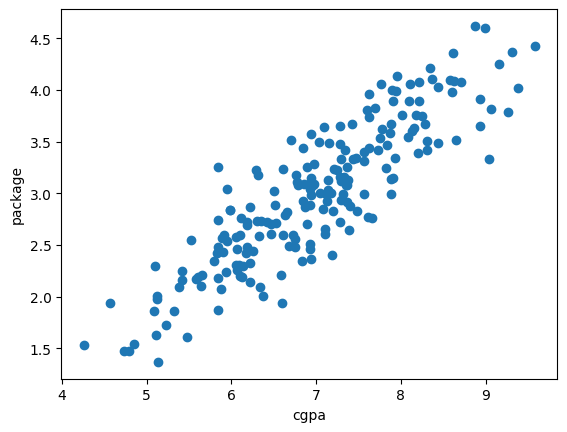

In [6]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel("cgpa")
plt.ylabel("package")

In [1]:
X=df[['cgpa']] #independent feature
y=df[['package']] #dependent feature

NameError: name 'df' is not defined

In [8]:
X.shape, y.shape

((200, 1), (200, 1))

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20,random_state=42)

In [11]:
X_train.shape, X_test.shape

((160, 1), (40, 1))

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler()

In [14]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [15]:
## model training
from sklearn.linear_model import LinearRegression

In [16]:
regressor=LinearRegression()

In [17]:
## training train data
regressor.fit(X_train,y_train)

LinearRegression()

In [18]:
regressor.intercept_  #b intercept

array([2.995875])

In [19]:
regressor.coef_  #m slope

array([[0.62421668]])

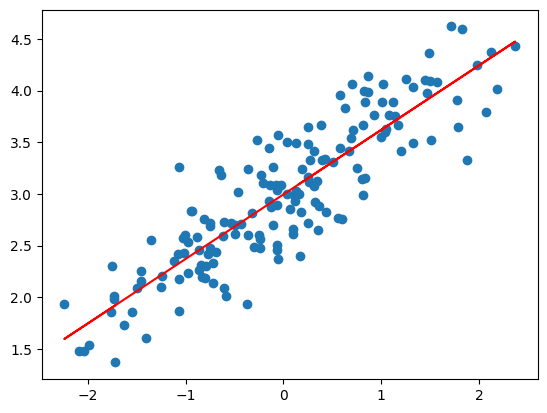

In [20]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train),'r')

In [21]:
#predicttion for test
y_pred_test=regressor.predict(X_test)

In [22]:
y_pred_test

array([[2.78031348],
       [3.13635249],
       [3.1995207 ],
       [2.38981908],
       [3.52684689],
       [3.76803461],
       [3.16506531],
       [2.54486832],
       [3.17655044],
       [3.4923915 ],
       [1.90744364],
       [2.34962112],
       [3.6876387 ],
       [2.75734322],
       [3.47516381],
       [3.04447145],
       [2.32665086],
       [3.20526327],
       [2.17734418],
       [3.314372  ],
       [2.45298729],
       [2.90090734],
       [3.32011456],
       [2.87219451],
       [3.33734226],
       [2.19457187],
       [1.41932564],
       [2.7114027 ],
       [3.18229301],
       [2.32665086],
       [3.74506435],
       [2.95833298],
       [3.68189614],
       [2.97556068],
       [2.59080884],
       [3.34882738],
       [2.47595755],
       [3.07318428],
       [4.17575671],
       [2.95833298]])

In [23]:
y_test

,package
95,2.79
15,3.23
30,3.26
158,3.04
128,3.34
115,4.21
69,2.94
170,2.87
174,2.99
45,3.58


#  performance metrics MAE,MSE, RMSE

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 

In [26]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

0.08417638361329662
0.23150985393278384
0.29013166599545215
